Importing file

In [ ]:
from google.colab import files#importing file
uploaded = files.upload()


Saving Wmunu_Run2011A.csv to Wmunu_Run2011A.csv


importing data as pandas dataframe

In [ ]:
#importing data as a pandas dataframe
import pandas as pd

df = pd.read_csv('Wmunu_Run2011A.csv')

print(df.shape)
df.head()

(155599, 11)


,Run,Event,pt,eta,phi,Q,chiSq,dxy,iso,MET,phiMET
0,173389,489963747,29.3153,-0.139250,1.356110,1,0.845578,-0.060012,0.00000,30.66700,-2.130810
1,173389,490024840,44.1461,-1.359000,-0.538965,1,1.294310,-0.012581,26.34230,27.95210,-2.668610
2,173389,490102189,42.7895,-1.019350,2.339020,-1,0.807800,-0.084001,2.97476,5.15651,0.306059
3,173389,490092121,31.2215,-0.127033,-0.488923,-1,109.949000,0.072264,56.48970,4.21427,-0.116569
4,173389,490193981,36.9668,1.855660,1.377200,1,1.059700,-0.067624,41.49100,20.99630,-1.625060


In [ ]:
df.describe()  #properties of the dataframe

,Run,Event,pt,eta,phi,Q,chiSq,dxy,iso,MET,phiMET
count,155599.000000,1.555990e+05,155599.000000,155599.000000,155599.000000,155599.000000,1.555990e+05,155599.000000,155599.000000,155599.000000,155599.000000
mean,169038.288916,3.731156e+08,38.463126,-0.000036,0.002051,0.097578,1.634401e+01,-0.012761,16.660334,26.724692,-0.117937
std,3224.066370,4.505506e+08,170.143336,1.079170,1.822322,0.995231,3.492007e+03,2.361651,69.888899,16.410425,1.763580
min,161217.000000,6.680000e+02,25.000100,-2.099990,-3.141330,-1.000000,5.616870e-05,-340.023000,0.000000,0.034547,-3.141550
25%,166512.000000,7.586580e+07,30.569400,-0.825424,-1.579390,-1.000000,7.405880e-01,-0.060376,0.603743,14.072650,-1.603265
50%,170896.000000,2.787367e+08,34.599900,0.000209,0.001093,1.000000,9.234980e-01,-0.000856,3.412960,24.622800,-0.219685
75%,171446.000000,4.134178e+08,40.315450,0.824632,1.590865,1.000000,1.253585e+00,0.059818,23.258350,36.981600,1.346970
max,173389.000000,2.125273e+09,49712.400000,2.099880,3.141570,1.000000,1.376680e+06,291.479000,24918.300000,332.550000,3.141550


In [ ]:
#all headers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

histogram of pt, MET and phiMET

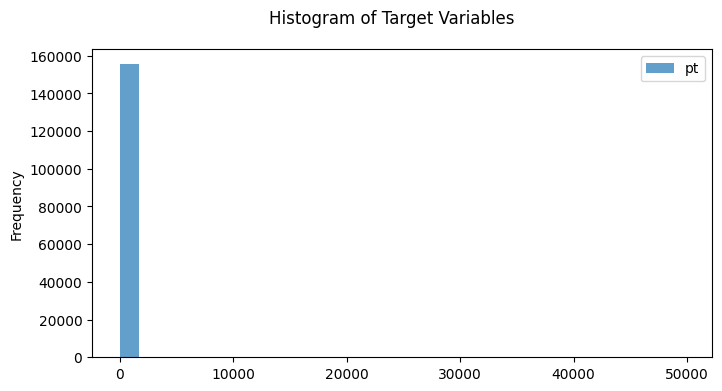

pt    170.142789
dtype: float64


In [ ]:
#momentum distribution of muon


df[['pt']].plot(kind='hist', bins=30, alpha=0.7, subplots=True, figsize=(8,4))
plt.suptitle("Histogram of Target Variables")
plt.show()

std= np.std(y, axis=0)#standard deviation of pt
print(std)


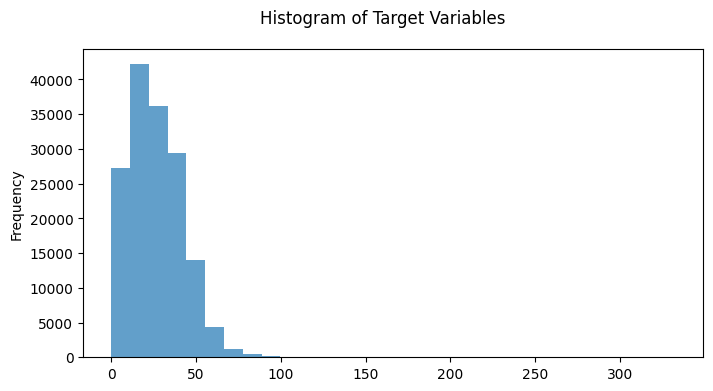

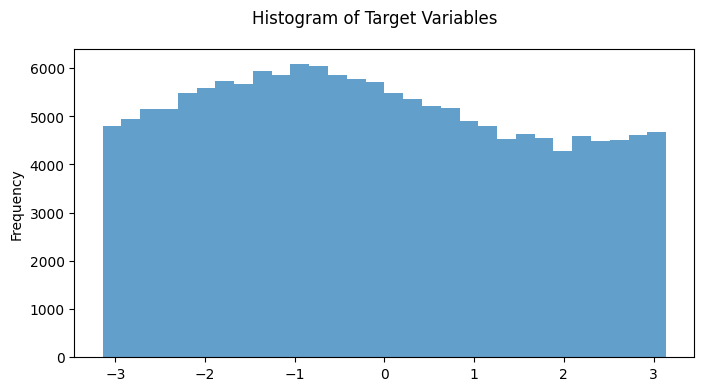

In [ ]:
#plotting missing momentum features which are implications of neutrino in decay products

#plotting missing momentum
df['MET'].plot(kind='hist', bins=30, alpha=0.7, subplots=True, figsize=(8,4))
plt.suptitle("Histogram of Target Variables")
plt.show()
#plotting phiMET as the angle
df['phiMET'].plot(kind='hist', bins=30, alpha=0.7, subplots=True, figsize=(8,4))
plt.suptitle("Histogram of Target Variables")
plt.show()

transverse mass reconstruction

In [ ]:
t_mass = np.sqrt(2*df.pt*df.MET *(1- np.cos(df.phi-df.phiMET)))#transverse mass formula
print(t_mass)


0         59.075395
1         61.453123
2         25.259728
3          4.246511
4         55.584353
            ...    
155594    65.155065
155595    50.670850
155596     1.950550
155597    77.618403
155598    56.478876
Length: 155599, dtype: float64


In [ ]:
df["t_mass"]= t_mass #adding t_mass to the dataframe
df.head()

,Run,Event,pt,eta,phi,Q,chiSq,dxy,iso,MET,phiMET,t_mass
0,173389,489963747,29.3153,-0.139250,1.356110,1,0.845578,-0.060012,0.00000,30.66700,-2.130810,59.075395
1,173389,490024840,44.1461,-1.359000,-0.538965,1,1.294310,-0.012581,26.34230,27.95210,-2.668610,61.453123
2,173389,490102189,42.7895,-1.019350,2.339020,-1,0.807800,-0.084001,2.97476,5.15651,0.306059,25.259728
3,173389,490092121,31.2215,-0.127033,-0.488923,-1,109.949000,0.072264,56.48970,4.21427,-0.116569,4.246511
4,173389,490193981,36.9668,1.855660,1.377200,1,1.059700,-0.067624,41.49100,20.99630,-1.625060,55.584353


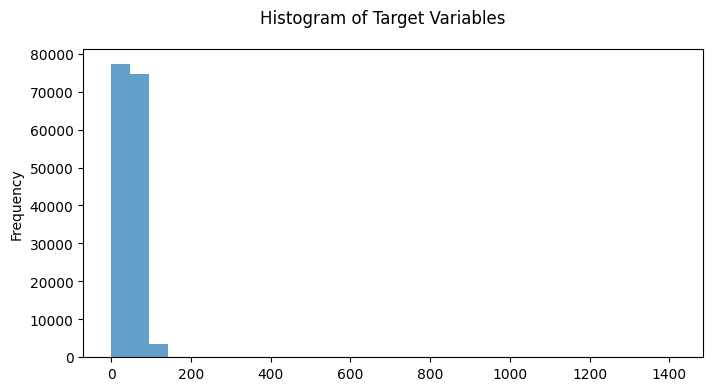

In [ ]:
#plotting t_mass histogram
df['t_mass'].plot(kind='hist', bins=30, alpha=0.7, subplots=True, figsize=(8,4))
plt.suptitle("Histogram of Target Variables")
plt.show()

applying Xgboost on t_mass as target

In [ ]:



X = df[['pt','eta','phi','Q','chiSq','dxy','iso','MET','phiMET']] #features
y = df['t_mass'] #transverse mass as target

#train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42
)

# Log-transform target for training due to skewed data
y_train_log = np.log1p(y_train)
y_test_log  = np.log1p(y_test)

#Base estimator
base = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    learning_rate=0.10,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

#RFECV with 5-fold CV
cv = KFold(n_splits=5, shuffle=True, random_state=42)
rfecv = RFECV(
    estimator=base,
    step=1,
    cv=cv,
    scoring="r2",
    n_jobs=-1,
    min_features_to_select=1
)

#Fitting RFECV on TRAIN (log target)
rfecv.fit(X_train, y_train_log)

# Selected features mask & names
mask = rfecv.support_
selected_features = list(X.columns[mask])

# Evaluating on LOG scale (apples-to-apples with training target)
# Baseline: all features
base_all = base.fit(X_train, y_train_log)
y_pred_all_log = base_all.predict(X_test)

# Selected-only (use the estimator_ already refit by RFECV)
X_test_sel = X_test.loc[:, selected_features]
y_pred_sel_log = rfecv.estimator_.predict(X_test_sel)

def metrics(y_true, y_pred):#mean squared error and r^2
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return r2, rmse

r2_all_log, rmse_all_log = metrics(y_test_log, y_pred_all_log)
r2_sel_log, rmse_sel_log = metrics(y_test_log, y_pred_sel_log)

#Evaluating on ORIGINAL scale
y_pred_all = np.expm1(y_pred_all_log)
y_pred_sel = np.expm1(y_pred_sel_log)

r2_all, rmse_all = metrics(y_test, y_pred_all)
r2_sel, rmse_sel = metrics(y_test, y_pred_sel)

# 7) R^2% from RMSE/std on ORIGINAL scale
std_y = y_test.values.std(ddof=0)  # population std; use ddof=1 for sample std
R2pct_all = (1 - (rmse_all / std_y) ** 2) * 100
R2pct_sel = (1 - (rmse_sel / std_y) ** 2) * 100

# 8) Report
print(f"RFECV chose {mask.sum()} of {X.shape[1]} features:", selected_features)
print("\nLOG scale:")
print(f"All-feat   -> R^2={r2_all_log:.3f}, RMSE={rmse_all_log:.3f}")
print(f"Selected   -> R^2={r2_sel_log:.3f}, RMSE={rmse_sel_log:.3f}")

print("\nORIGINAL scale:")
print(f"All-feat   -> R^2={r2_all:.3f}, RMSE={rmse_all:.3f}, R2%≈{R2pct_all:.1f}")
print(f"Selected   -> R^2={r2_sel:.3f}, RMSE={rmse_sel:.3f}, R2%≈{R2pct_sel:.1f}")


RFECV chose 4 of 9 features: ['phi', 'iso', 'MET', 'phiMET']

LOG scale:
All-feat   -> R^2=0.921, RMSE=0.262
Selected   -> R^2=0.927, RMSE=0.251

ORIGINAL scale:
All-feat   -> R^2=0.946, RMSE=6.655, R2%≈94.6
Selected   -> R^2=0.888, RMSE=9.540, R2%≈88.8
